<a href="https://colab.research.google.com/github/vidush5/Advanced-NLP-Techniques/blob/master/AutoNLP_MultiClass_Classification_and_Mixed_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install autoviml

In [21]:
!pip install pyforest

In [0]:
# importing relevant libraries
import tensorflow_datasets as tfds
import pyforest

In [0]:
# loading dataset
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)

train_dataset = dataset['train']

In [24]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [0]:
# Convert the dataset into numpy array
dataset = tfds.as_numpy(train_dataset)

In [26]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [0]:
verified_purchase = dataset['data']['verified_purchase']
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
rating = dataset['data']['star_rating']

In [28]:
reviews_df = pd.DataFrame(np.hstack((verified_purchase[:,None], helpful_votes[:,None], review_headline[:,None], review_body[:,None], rating[:,None])), columns=['verified', 'votes', 'headline','reviews','rating'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
# Creating datatype for each column in dataframe using dictionary
convert_dict = {'verified':int,
              'votes':int,
              'headline':str,
              'reviews':str,
              'rating': int}

In [0]:
# Changing datatype of each columns
reviews_df = reviews_df.astype(convert_dict)

In [32]:
reviews_df

,verified,votes,headline,reviews,rating
0,0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,0,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,0,b'Five Stars',b'Top quality.',5
4,0,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3
...,...,...,...,...,...
85976,0,2,b'YES!',"b""This is the real deal. Don't bother with the...",5
85977,0,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5
85978,1,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3
85979,0,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2


In [0]:
# Converting rating into three different classes
def convert_rating(rating):
  if rating <= 2 :
    out=0
  elif rating == 3:
    out=1
  else:
    out=2

  return out

In [0]:
# Creating a new dataframe
reviews_df['target'] = reviews_df['rating'].apply(lambda x: convert_rating(x))

In [36]:
reviews_df

,verified,votes,headline,reviews,rating,target
0,0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4,2
1,0,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5,2
2,0,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4,2
3,0,0,b'Five Stars',b'Top quality.',5,2
4,0,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3,1
...,...,...,...,...,...,...
85976,0,2,b'YES!',"b""This is the real deal. Don't bother with the...",5,2
85977,0,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5,2
85978,1,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3,1
85979,0,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2,0


In [37]:
revies_df.shape[0]

85981

In [38]:
revies_df.shape[1]

5

In [39]:
reviews_df['target'].value_counts()

2    62554
0    16377
1     7050
Name: target, dtype: int64

In [40]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85981 entries, 0 to 85980
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   verified  85981 non-null  int64 
 1   votes     85981 non-null  int64 
 2   headline  85981 non-null  object
 3   reviews   85981 non-null  object
 4   rating    85981 non-null  int64 
 5   target    85981 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


In [0]:
# Drop the rating column
reviews_df = reviews_df.drop('rating', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.25)

In [0]:
from autoviml.Auto_ViML import Auto_ViML

In [0]:
target = 'target'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (64485, 5)
    Training Set Memory Usage = 2.95 MB
Test Set Shape = (21496, 5)
    Test Set Memory Usage = 0.98 MB
Single_Label Target: ['target']
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
Shuffling the data set before training
 Class  -> Counts -> Percent
     1:    5240  ->    8.1%
     0:   12257  ->   19.0%
     2:   46988  ->   72.9%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
    Target target is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Cat

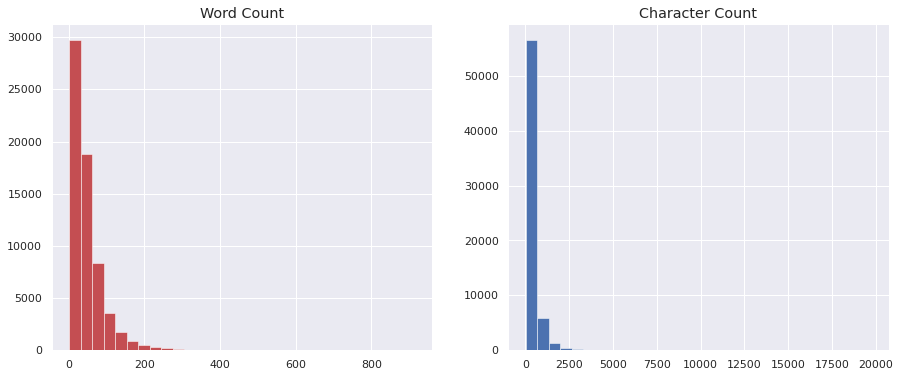

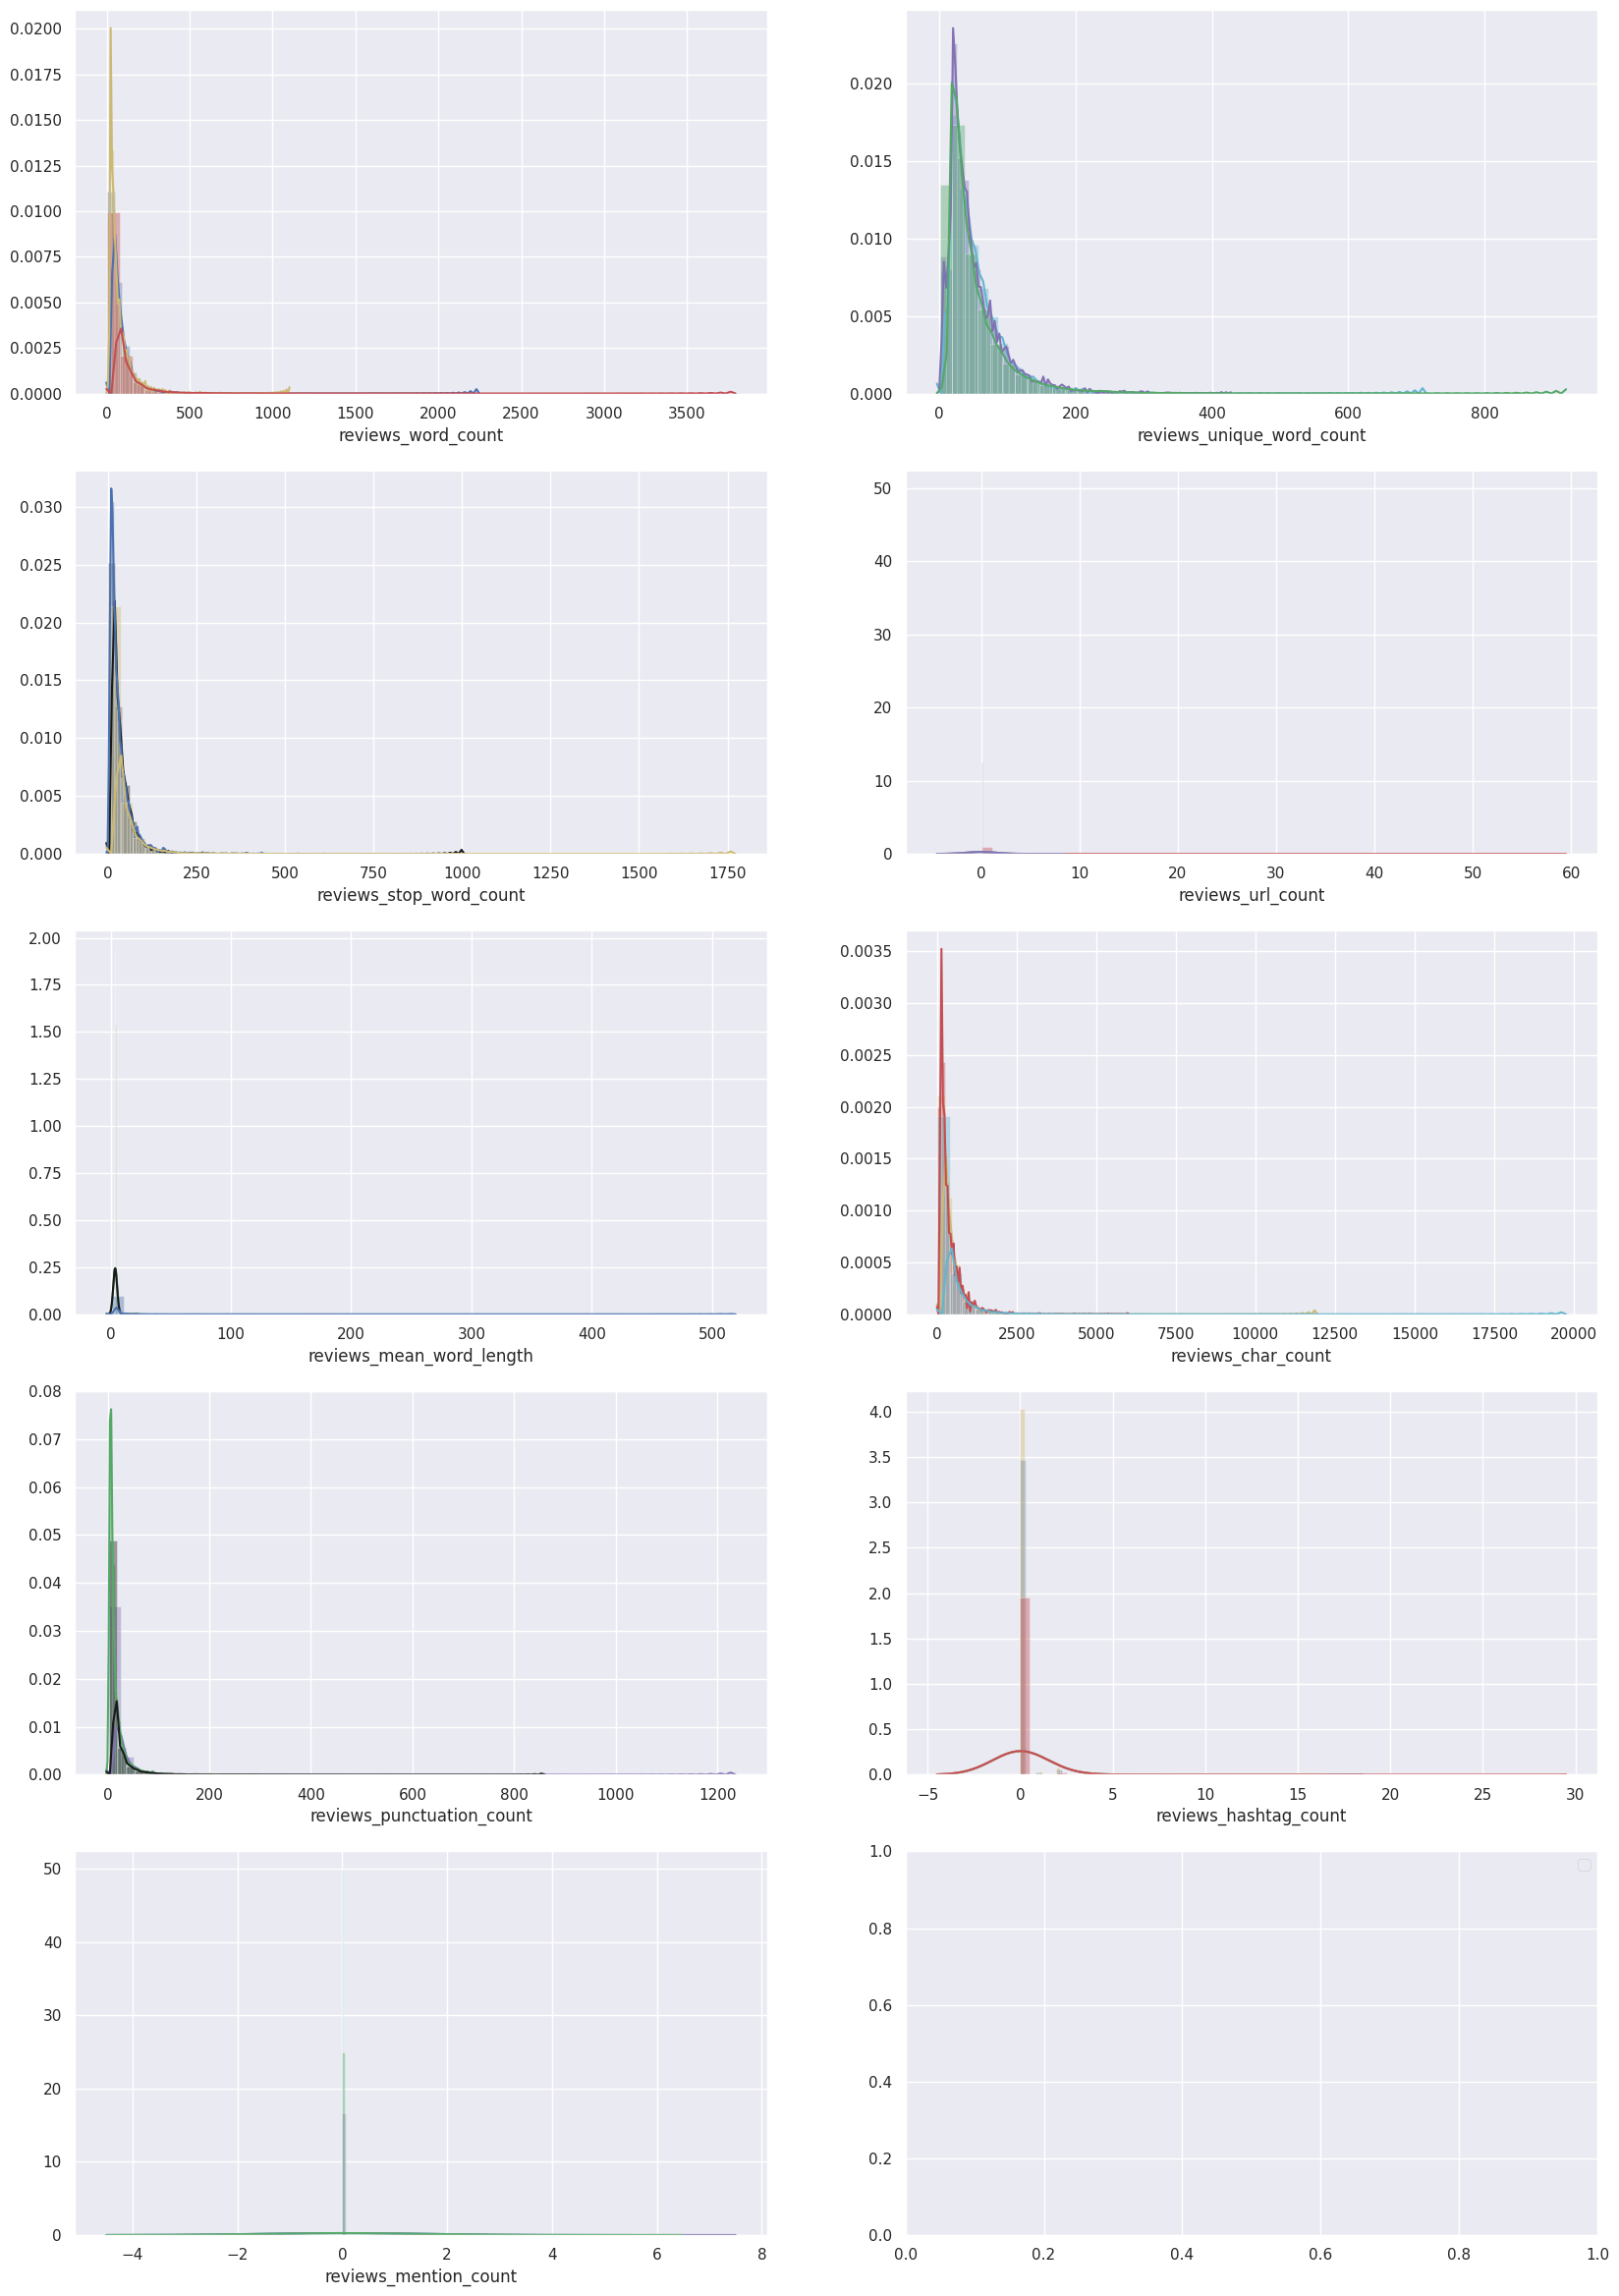

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in reviews before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 12 seconds
        Time Taken for Processing text in Train data = 307 seconds
            Time Taken for Stopword removal in Train data = 26 seconds
    Cleaning text in reviews before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 4 seconds
        Time Taken for Processing text in Test data = 101 seconds
            Time Taken for Stopword removal in Test data = 9 seconds
Train and Test data Text cleaning completed. Time taken = 113 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = reviews 
#################################################################################
Generating 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.068801


0:	test: 0.7099268	best: 0.7099268 (0)	total: 313ms	remaining: 20m 52s
100:	test: 0.8493298	best: 0.8493298 (100)	total: 18.1s	remaining: 11m 37s
200:	test: 0.8588579	best: 0.8588579 (200)	total: 36.2s	remaining: 11m 23s
300:	test: 0.8616692	best: 0.8617047 (297)	total: 53.7s	remaining: 10m 59s
400:	test: 0.8633153	best: 0.8633153 (400)	total: 1m 11s	remaining: 10m 39s
500:	test: 0.8643509	best: 0.8643509 (500)	total: 1m 28s	remaining: 10m 21s
600:	test: 0.8650149	best: 0.8650854 (579)	total: 1m 46s	remaining: 10m 2s
700:	test: 0.8653635	best: 0.8653741 (698)	total: 2m 4s	remaining: 9m 44s
800:	test: 0.8655314	best: 0.8655335 (798)	total: 2m 21s	remaining: 9m 25s
900:	test: 0.8657588	best: 0.8658025 (891)	total: 2m 39s	remaining: 9m 6s
1000:	test: 0.8656722	best: 0.8659351 (920)	total: 2m 56s	remaining: 8m 49s
1100:	test: 0.8658090	best: 0.8659351 (920)	total: 3m 14s	remaining: 8m 31s
1200:	test: 0.8658153	best: 0.8659580 (1148)	total: 3m 31s	remaining: 8m 13s
1300:	test: 0.8659133	bes

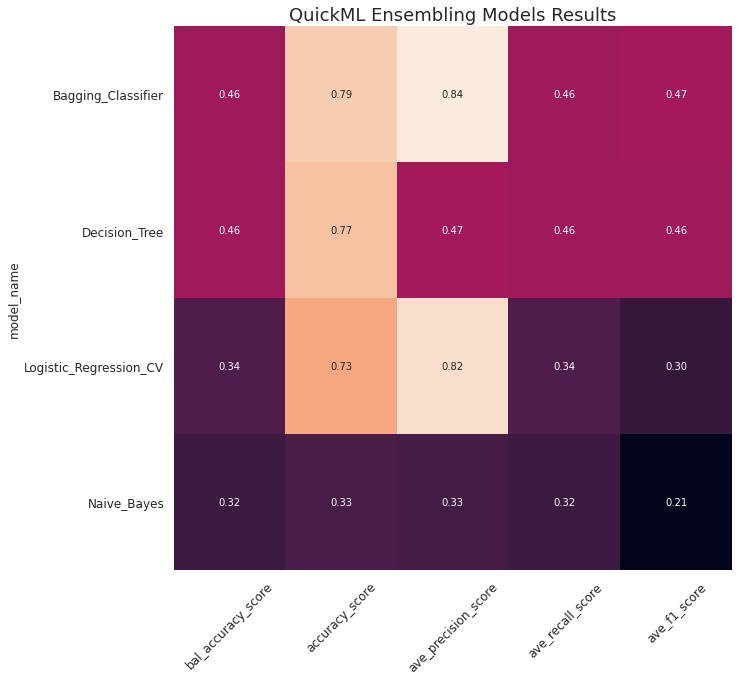

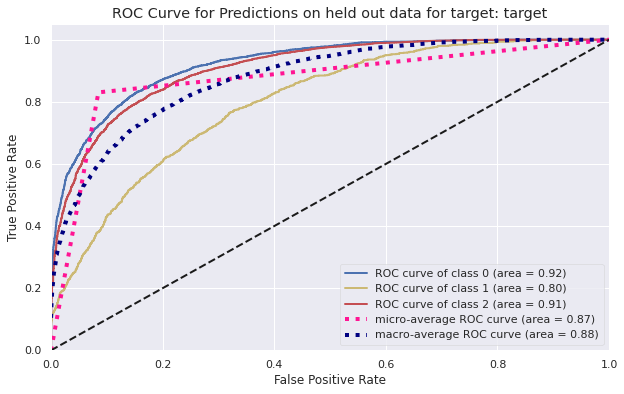

Average precision score, micro-averaged over all classes: 0.91
Macro F1 score, averaged over all classes: 0.60


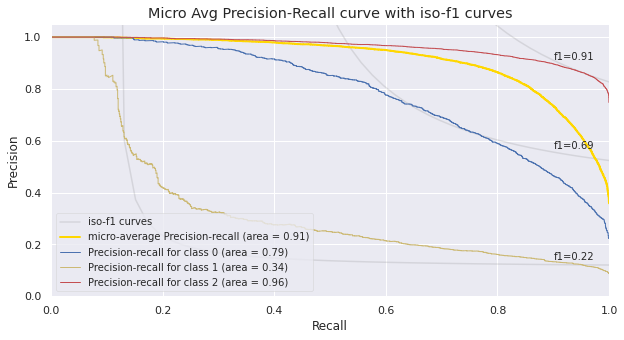

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 57.824%
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2451
           1       0.71      0.13      0.22      1048
           2       0.86      0.96      0.91      9398

    accuracy                           0.83     12897
   macro avg       0.77      0.58      0.60     12897
weighted avg       0.82      0.83      0.81     12897

[[1586   23  842]
 [ 238  133  677]
 [ 338   31 9029]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


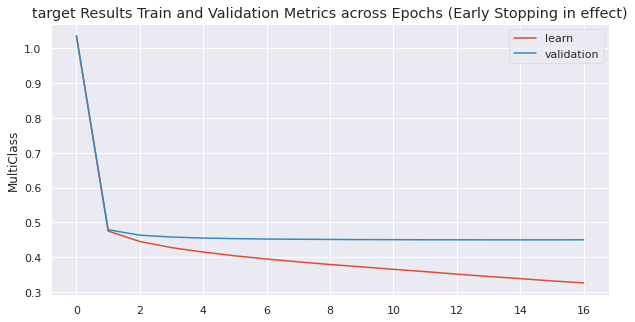

    Time taken for this Target (in seconds) = 1867
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 11
For CatBoost, feature scaling is not required. Continuing...
0:	total: 222ms	remaining: 5m 14s
100:	total: 20s	remaining: 4m 20s
200:	total: 40.7s	remaining: 4m 5s
300:	total: 1m	remaining: 3m 45s
400:	total: 1m 20s	remaining: 3m 24s
500:	total: 1m 40s	remaining: 3m 2s
600:	total: 2m	remaining: 2m 42s
700:	total: 2m 20s	remaining: 2m 22s
800:	total: 2m 39s	remaining: 2m 2s
900:	total: 2m 59s	remaining: 1m 42s
1000:	total: 3m 19s	remaining: 1m 22s
1100:	total: 3m 39s	remaining: 1m 2s
1200:	total: 3m 58s	remaining: 42.7s
1300:	total: 4m 18s	remaining: 22.8s
1400:	total: 4m 37s	remain

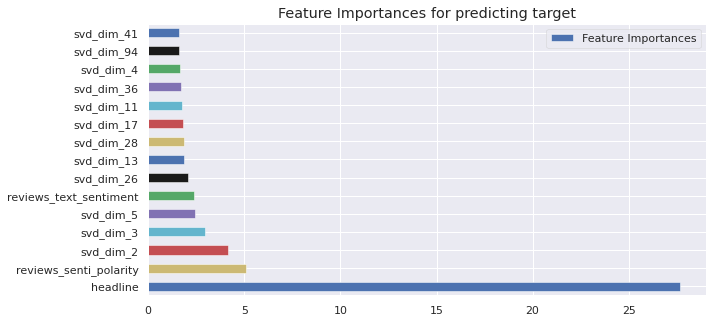

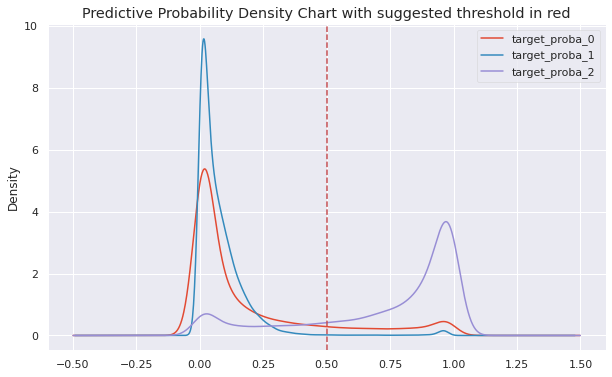

In [48]:
m, feats, trainm, testm = Auto_ViML(train, target, test,
                                    sample_submission='',
                                    scoring_parameter='', KMeans_Featurizer=False,
                                    hyper_param='RS', feature_reduction=True,
                                    Boosting_Flag='CatBoost', Binning_Flag=False,
                                    verbose=2)

In [49]:
feats

['reviews_senti_polarity',
 'reviews_text_sentiment',
 'svd_dim_2',
 'headline',
 'svd_dim_3',
 'verified',
 'svd_dim_28',
 'svd_dim_5',
 'svd_dim_13',
 'reviews_char_count',
 'svd_dim_26',
 'svd_dim_36',
 'reviews_word_count',
 'svd_dim_17',
 'svd_dim_94',
 'svd_dim_37',
 'svd_dim_93',
 'reviews_unique_word_count',
 'svd_dim_92',
 'svd_dim_4',
 'svd_dim_11',
 'svd_dim_64',
 'svd_dim_22',
 'svd_dim_20',
 'svd_dim_32',
 'reviews_mean_word_length',
 'svd_dim_40',
 'svd_dim_34',
 'reviews_punctuation_count',
 'votes',
 'svd_dim_41',
 'svd_dim_47',
 'svd_dim_58',
 'svd_dim_85',
 'svd_dim_66',
 'svd_dim_57',
 'reviews_stop_word_count',
 'svd_dim_44',
 'svd_dim_49',
 'svd_dim_52',
 'svd_dim_78',
 'svd_dim_79',
 'svd_dim_95',
 'svd_dim_48',
 'svd_dim_88',
 'svd_dim_97',
 'svd_dim_82',
 'svd_dim_96',
 'svd_dim_67',
 'svd_dim_68',
 'svd_dim_75',
 'svd_dim_74',
 'svd_dim_84',
 'svd_dim_98',
 'svd_dim_91',
 'svd_dim_99',
 'svd_dim_90',
 'reviews_url_count',
 'reviews_hashtag_count']

In [50]:
testm

,reviews_senti_polarity,reviews_text_sentiment,svd_dim_2,headline,svd_dim_3,verified,svd_dim_28,svd_dim_5,svd_dim_13,reviews_char_count,svd_dim_26,svd_dim_36,reviews_word_count,svd_dim_17,svd_dim_94,svd_dim_37,svd_dim_93,reviews_unique_word_count,svd_dim_92,svd_dim_4,svd_dim_11,svd_dim_64,svd_dim_22,svd_dim_20,svd_dim_32,reviews_mean_word_length,svd_dim_40,svd_dim_34,reviews_punctuation_count,votes,svd_dim_41,svd_dim_47,svd_dim_58,svd_dim_85,svd_dim_66,svd_dim_57,reviews_stop_word_count,svd_dim_44,svd_dim_49,svd_dim_52,svd_dim_78,svd_dim_79,svd_dim_95,svd_dim_48,svd_dim_88,svd_dim_97,svd_dim_82,svd_dim_96,svd_dim_67,svd_dim_68,svd_dim_75,svd_dim_74,svd_dim_84,svd_dim_98,svd_dim_91,svd_dim_99,svd_dim_90,reviews_url_count,reviews_hashtag_count,target_predictions,target_Logistic_Regression_CV_predictions,target_Decision_Tree_predictions,target_Naive_Bayes_predictions,target_Bagging_Classifier_predictions,target_CatBoost_predictions,target_proba_0,target_proba_1,target_proba_2,target_Ensembled_predictions
10479,0.52,0.52,-0.32,18239,0.03,1,0.49,-1.06,-0.07,377,-1.33,-0.45,77,1.98,-0.30,0.31,-0.09,54,-0.18,-0.38,-0.75,-0.08,-0.55,-0.52,-0.85,3,0.27,-0.15,12,1,0.36,-0.13,-0.31,0.10,0.53,-0.02,38,-0.18,-0.18,0.39,-0.37,0.11,0.23,-0.81,-0.01,0.37,0.33,-0.03,0.00,0.13,0.13,-0.15,-0.24,-0.09,0.01,-0.16,0.29,0,0,2,2,2,2,2,2,0.04,0.14,0.83,2
35234,0.20,0.20,-0.53,55706,0.34,0,-0.37,0.55,0.16,121,0.10,0.19,25,-0.09,-0.15,0.35,0.11,24,0.01,-0.13,0.08,-0.07,0.13,0.05,-0.00,3,-0.00,-0.18,5,1,0.02,-0.07,-0.04,-0.01,-0.07,0.18,15,0.23,-0.15,0.06,0.05,0.05,0.10,-0.08,0.12,-0.03,0.02,-0.04,0.07,0.01,0.17,-0.01,-0.03,0.31,-0.04,0.12,0.08,0,0,2,2,2,1,2,2,0.28,0.19,0.53,2
14834,0.00,0.00,-0.02,57245,0.01,1,0.02,-0.05,-0.01,53,0.02,-0.03,10,-0.01,0.14,0.04,0.07,10,-0.11,-0.04,0.04,-0.03,-0.05,0.06,-0.01,4,0.04,0.02,2,2,-0.05,-0.09,0.43,-0.03,0.03,-0.11,4,0.00,-0.02,0.10,0.08,0.06,-0.05,0.00,-0.05,0.02,0.00,-0.09,0.32,0.12,-0.06,0.05,0.09,0.01,-0.02,0.01,0.07,0,0,2,2,2,1,2,2,0.43,0.05,0.52,2
9890,0.07,0.07,2.37,31239,-1.75,0,-0.02,1.75,-0.22,400,-0.23,-0.19,85,-0.03,0.13,0.05,0.19,65,0.35,0.05,-0.09,0.08,-0.08,-0.64,0.03,3,-0.01,-0.16,15,9,-0.00,-0.14,-0.30,0.16,-0.08,-0.40,46,0.13,-0.17,0.39,-0.11,-0.12,0.16,0.14,-0.10,0.15,0.05,-0.15,0.05,0.01,0.06,0.06,0.04,0.16,-0.28,-0.35,-0.18,0,0,2,2,2,2,2,2,0.09,0.14,0.77,2
41190,0.40,0.40,-0.00,10128,0.04,1,0.05,-0.53,-0.25,111,-0.50,0.05,25,0.18,-0.04,0.07,0.18,22,-0.09,-0.09,-0.36,0.05,0.37,0.17,-0.28,3,-0.10,-0.07,6,2,0.13,0.12,-0.06,-0.13,-0.03,0.04,15,0.11,-0.16,-0.22,-0.00,0.01,0.18,0.18,-0.03,-0.35,0.06,-0.14,0.14,-0.04,-0.07,0.16,0.05,0.03,-0.05,-0.11,-0.17,0,0,2,2,2,2,2,2,0.01,0.03,0.97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36144,0.45,0.45,0.42,54032,-0.65,1,0.07,0.43,0.39,213,-0.67,0.07,41,0.76,-0.40,-0.60,-0.26,33,0.07,-0.14,-0.30,0.29,-0.01,-0.12,0.33,4,-0.00,0.17,8,0,-0.09,-0.15,-0.44,0.26,0.16,0.41,17,-0.73,0.73,-0.12,-0.44,-0.15,-0.10,0.53,0.01,-0.33,0.06,-0.15,-0.22,-0.28,0.00,0.43,0.26,0.43,0.22,0.09,0.19,0,0,2,2,2,1,2,2,0.02,0.04,0.94,2
18008,0.23,0.23,-0.36,7434,-0.63,0,0.73,-1.50,-0.88,183,0.41,0.06,34,0.24,0.31,-0.45,0.06,29,0.05,0.48,0.76,-0.40,0.08,-0.14,0.47,4,-0.01,-0.16,5,1,-0.00,0.18,-0.08,-0.13,-0.09,0.41,17,-0.07,0.39,-0.12,0.00,0.04,-0.20,-0.17,0.05,0.10,0.04,0.12,0.04,0.21,-0.15,0.14,0.11,0.03,-0.06,0.05,0.10,0,0,2,2,2,2,2,2,0.19,0.04,0.77,2
52511,0.20,0.20,-0.08,46014,-0.01,0,-0.07,-0.04,0.10,48,0.04,-0.03,9,-0.02,-0.23,0.03,0.19,9,0.13,-0.06,-0.07,-0.12,0.14,0.11,-0.12,4,0.05,-0.05,8,0,-0.10,0.00,0.01,0.12,-0.28,0.10,3,-0.08,0.16,0.26,0.19,0.04,0.01,-0.25,0.18,-0.06,-0.05,0.01,0.11,-0.02,-0.05,0.13,0.06,0.27,-0.03,0.03,0.10,0,0,2,2,2,1,2,2,0.18,0.19,0.63,2
60497,-0.15,-0.15,0.53,8027,-0.53,0,-0.01,0.36,0.24,152,-0.32,0.51,26,0.70,-0.03,-

In [0]:
m.save_model('model', format='cbm')

In [52]:
!ls -alrt

total 8952
drwxr-xr-x 1 root root    4096 May 29 18:19 sample_data
drwxr-xr-x 1 root root    4096 Jun  8 16:15 .config
drwxr-xr-x 1 root root    4096 Jun 11 04:39 ..
drwxr-xr-x 5 root root    4096 Jun 11 06:05 catboost_info
drwxr-xr-x 2 root root    4096 Jun 11 06:17 target
drwxr-xr-x 1 root root    4096 Jun 11 06:21 .
-rw-r--r-- 1 root root 9139840 Jun 11 06:21 model


In [53]:
m.predict(testm[feats])

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [0]:
from autoviml.Auto_NLP import plot_confusion_matrix, plot_classification_matrix

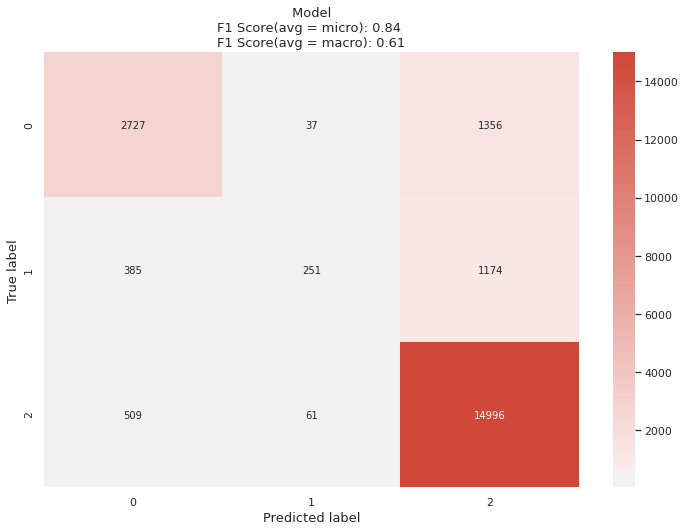

In [55]:
plot_confusion_matrix(test[target].values, m.predict(testm[feats]))